<a href="https://colab.research.google.com/github/NaveedIqbalSandhu/ML-Project/blob/main/Random_Forest_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/winequality-red.csv')

In [3]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [5]:
data.shape

(1599, 12)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
corr=data.corr()

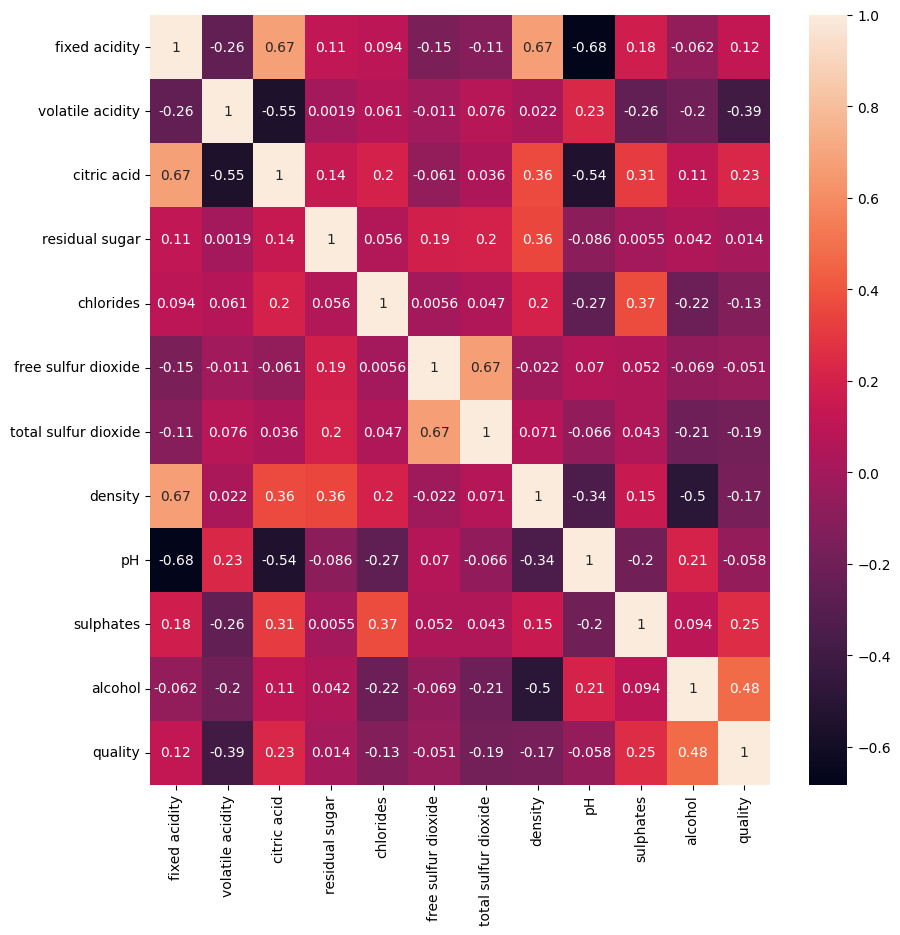

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.savefig('heatmap.png')
plt.show()

<Axes: ylabel='quality'>

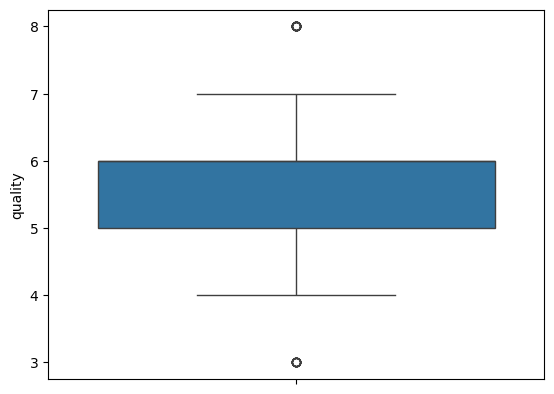

In [10]:
sns.boxplot(data['quality'])

In [15]:
from scipy import stats


In [16]:
z=np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

**z>3 >= This Is an Outlier**

In [18]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

**Remove all Records whose z score >3(outlier)**

In [19]:
new_data=data[(z<3).all(axis=1)]

In [20]:
new_data.shape

(1451, 12)

In [21]:
from sklearn.model_selection import train_test_split
x=new_data.drop('quality',axis=1)
y=new_data['quality']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc=RandomForestClassifier(n_estimators=100)

In [25]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
y_pred=rfc.predict(x_test)

In [33]:
y_pred

array([7, 5, 5, 6, 6, 5, 6, 5, 6, 5, 7, 6, 5, 6, 6, 7, 6, 6, 6, 5, 5, 5,
       6, 6, 7, 6, 6, 7, 5, 6, 7, 5, 6, 5, 5, 6, 6, 6, 5, 5, 7, 7, 6, 6,
       6, 6, 6, 6, 6, 5, 7, 5, 5, 5, 6, 5, 5, 7, 6, 6, 5, 5, 6, 5, 5, 6,
       5, 6, 6, 7, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5,
       5, 7, 5, 6, 6, 7, 5, 6, 6, 6, 7, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 7, 5, 6, 7, 5, 7, 6, 7, 5, 6, 7,
       5, 6, 5, 6, 5, 6, 5, 5, 7, 6, 6, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 7, 6, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 6, 7, 7, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 5, 6, 7, 6, 7, 5, 5, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 6, 6])

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)  # This calculates accuracy properly
print("Accuracy:", accuracy)


Accuracy: 0.6632302405498282


In [35]:
accuracy

0.6632302405498282

[Text(0.5858524788391778, 0.975, 'x[0] <= 10.05\ngini = 0.621\nsamples = 724\nvalue = [28, 516, 475, 131, 10]'),
 Text(0.30354443772672307, 0.925, 'x[1] <= 0.405\ngini = 0.598\nsamples = 608\nvalue = [22, 476, 385, 86, 7]'),
 Text(0.4446984582829504, 0.95, 'True  '),
 Text(0.10761789600967352, 0.875, 'x[6] <= 21.5\ngini = 0.657\nsamples = 152\nvalue = [3, 60, 109, 60, 4]'),
 Text(0.036275695284159616, 0.825, 'x[10] <= 10.85\ngini = 0.624\nsamples = 39\nvalue = [1, 10, 13, 28, 1]'),
 Text(0.019347037484885126, 0.775, 'x[7] <= 0.997\ngini = 0.43\nsamples = 10\nvalue = [0, 8, 2, 0, 1]'),
 Text(0.014510278113663845, 0.725, 'x[0] <= 8.5\ngini = 0.64\nsamples = 5\nvalue = [0, 2, 2, 0, 1]'),
 Text(0.009673518742442563, 0.675, 'x[7] <= 0.996\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 0, 0, 1]'),
 Text(0.0048367593712212815, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]'),
 Text(0.014510278113663845, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]'),
 Text(0.0193470374848851

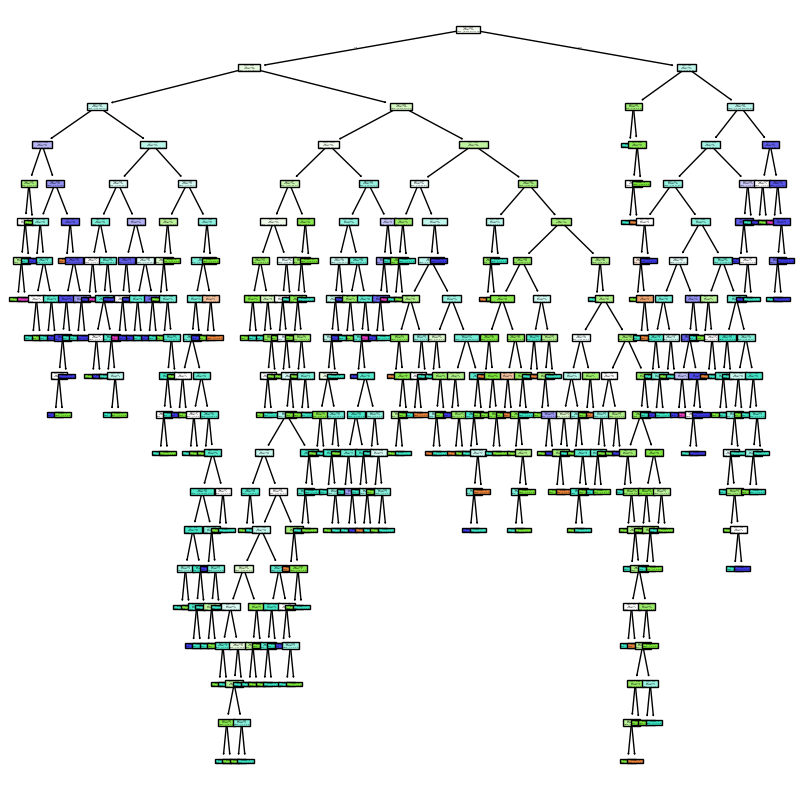

In [38]:
plt.figure(figsize=(10,10))
from sklearn import tree
tree.plot_tree(rfc.estimators_[0],filled=True)